In [3]:
%matplotlib inline
import sys, os, time
import collections

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import subprocess

# Super-resolution training results

## Peek at the `*_history.txt` files

In [4]:
df = pd.read_csv("../results/results_sr_epochs_100_0/train-hr_md_1m_2013_train-sr_de_1m_2013/minibatch_history.txt", delimiter=",")
df.columns

Index(['Batch Number', 'Time Elapsed', 'loss', 'outputs_hr_loss',
       'outputs_sr_loss', 'outputs_hr_accuracy'],
      dtype='object')

In [5]:
df = pd.read_csv("../results/results_sr_epochs_100_0/train-hr_md_1m_2013_train-sr_de_1m_2013/epoch_history.txt", delimiter=",")
df.columns

Index(['Epoch Number', 'Time Elapsed', 'val_loss', 'val_outputs_hr_loss',
       'val_outputs_sr_loss', 'val_outputs_hr_accuracy', 'loss',
       'outputs_hr_loss', 'outputs_sr_loss', 'outputs_hr_accuracy'],
      dtype='object')

## All of the results we have

In [6]:
epoch_files = [
    #"../results/results_sr_epochs_100_0/train-hr_md_1m_2013_train-sr_de_1m_2013/epoch_history.txt",
    "../results/results_sr_epochs_100_0/train-hr_md_1m_2013_train-sr_ny_1m_2013/epoch_history.txt"
]

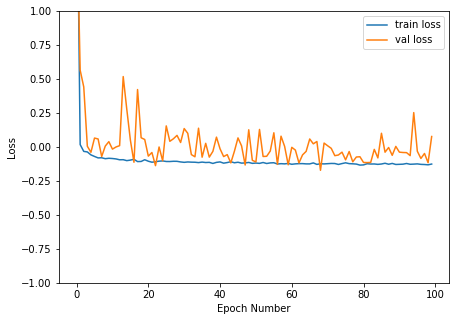

In [16]:
plt.figure(figsize=(7,5))

df = pd.read_csv(epoch_fn, delimiter=",")

x = df["Epoch Number"]
y = df["outputs_hr_loss"]
#y_smooth = np.convolve(y, np.ones((window_size,))/window_size, mode='same')

plt.plot(x, df["loss"], label="train loss")
plt.plot(x, df["val_loss"], label="val loss")

plt.ylim([-1,1])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
plt.close()   

# High-resolution training results

## Peek at the `*_history.txt` files

In [6]:
df = pd.read_csv("../results/results_epochs_20_1/train-output_de_1m_2013/minibatch_history.txt", delimiter=",")
df.columns

Index(['Batch Number', 'Time Elapsed', 'loss', 'categorical_crossentropy',
       'accuracy', 'jaccard_loss'],
      dtype='object')

In [7]:
df = pd.read_csv("../results/results_epochs_20_1/train-output_de_1m_2013/epoch_history.txt", delimiter=",")
df.columns

Index(['Epoch Number', 'Time Elapsed', 'val_loss',
       'val_categorical_crossentropy', 'val_accuracy', 'val_jaccard_loss',
       'loss', 'categorical_crossentropy', 'accuracy', 'jaccard_loss'],
      dtype='object')

## All of the results we have

In [2]:
splits = [
    "de_1m_2013",
    "ny_1m_2013",
    "md_1m_2013",
    "pa_1m_2013",
    "va_1m_2014",
    "wv_1m_2014"
]

In [3]:
output_dirs = [
    "../results/results_epochs_20_1",
    "../results/results_epochs_20_2",
    "../results/results_epochs_20_3"
]

## Plot smoothed minibatch loss for a particular train state over runs

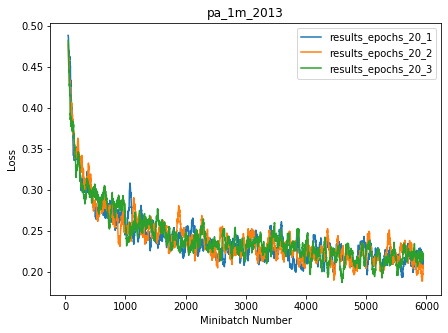

In [11]:
window_size = 50

plt.figure(figsize=(7,5))

train_split = splits[3]
for output_dir in output_dirs:
    
    df = pd.read_csv("{}/train-output_{}/minibatch_history.txt".format(output_dir, train_split), delimiter=",")
    x = df["Batch Number"]
    y = df["loss"]
    
    y_smooth = np.convolve(y, np.ones((window_size,))/window_size, mode='same')

    plt.plot(x[window_size:-window_size], y_smooth[window_size:-window_size], label=output_dir.split("/")[-1])

plt.title(train_split)
plt.xlabel("Minibatch Number")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
plt.close()   

## Plot per epoch validation loss for a particular train state over runs

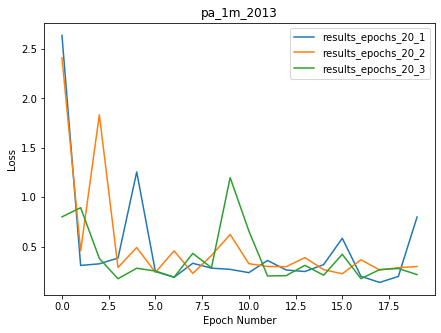

In [16]:
plt.figure(figsize=(7,5))

train_split = splits[3]
for output_dir in output_dirs:
    
    df = pd.read_csv("{}/train-output_{}/epoch_history.txt".format(output_dir, train_split), delimiter=",")
    x = df["Epoch Number"]
    y = df["val_loss"]
    y_smooth = np.convolve(y, np.ones((window_size,))/window_size, mode='same')

    plt.plot(x, y_smooth, label=output_dir.split("/")[-1])

plt.title(train_split)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
plt.close()   